In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_input = pd.read_excel('region_wise_sales.xlsx')
df_input.head()

,Month,Year,Region,Sales
0,January,2022,APAC,36750
1,February,2022,APAC,36995
2,March,2022,APAC,18579
3,April,2022,APAC,37768
4,May,2022,APAC,23956


In [5]:
df_input['Region'].unique()

array(['APAC', 'Europe', 'Americas'], dtype=object)

In [6]:
apac= df_input.loc[df_input['Region'] == 'APAC']
europe = df_input.loc[df_input['Region'] == 'Europe']
america = df_input.loc[df_input['Region'] == 'America']

In [7]:
def remove_outlier(df):
    Q1 = df['Sales'].quantile(0.25)
    Q3  = df['Sales'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [8]:
apac_lower, apac_upper = remove_outlier(apac)
europe_lower, europe_upper = remove_outlier(europe)
america_lower, america_upper = remove_outlier(america)
print(f"APAC Sales Lower Bound: {apac_lower}, Upper Bound: {apac_upper}")
print(f"Europe Sales Lower Bound: {europe_lower}, Upper Bound: {europe_upper}")
print(f"America Sales Lower Bound: {america_lower}, Upper Bound: {america_upper}")

APAC Sales Lower Bound: -737.125, Upper Bound: 59747.875
Europe Sales Lower Bound: 7306.875, Upper Bound: 17665.875
America Sales Lower Bound: nan, Upper Bound: nan


In [9]:
region_list = df_input['Region'].unique()
print("Regions:", region_list)

Regions: ['APAC' 'Europe' 'Americas']


In [11]:
plot_data = [df_input[df_input['Region'] == region]['Sales'] for region in region_list]
plot_data

[0     36750
 1     36995
 2     18579
 3     37768
 4     23956
 5     38143
 6     29132
 7     21961
 8     33299
 9     37279
 10    21388
 11    21896
 Name: Sales, dtype: int64,
 12     9665
 13    10297
 14    11079
 15    13410
 16    11229
 17    15352
 18    13286
 19    11470
 20    11873
 21    23000
 22    12215
 23    14895
 Name: Sales, dtype: int64,
 24    30247
 25    29284
 26    27904
 27    23407
 28    23716
 29    25077
 30    33649
 31    24560
 32    34102
 33    28257
 34    30691
 35    29387
 Name: Sales, dtype: int64]

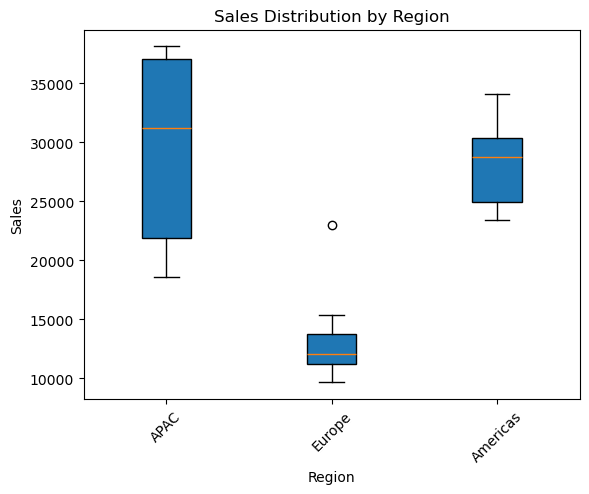

In [17]:
plt.Figure(figsize=(12, 6))
plt.boxplot(plot_data, vert=True, patch_artist=True)
plt.title('Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(ticks=range(1, len(region_list) + 1), labels=region_list, rotation=45)
plt.xticks(rotation=45)
plt.show()
